In [1]:
import tensorflow as tf
import numpy as np
import math, random
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
np.random.seed(1000) # for repro
function_to_learn = lambda x: np.sin(x) + 0.1*np.random.randn(*x.shape)
NUM_HIDDEN_NODES = 20
NUM_EXAMPLES = 1000
TRAIN_SPLIT = .8
MINI_BATCH_SIZE = 100
NUM_EPOCHS = 1000

In [3]:
all_x = np.float32(
    np.random.uniform(-2*math.pi, 2*math.pi, (1, NUM_EXAMPLES))).T
np.random.shuffle(all_x)
train_size = int(NUM_EXAMPLES*TRAIN_SPLIT)
trainx = all_x[:train_size]
validx = all_x[train_size:]
trainy = function_to_learn(trainx)
validy = function_to_learn(validx)

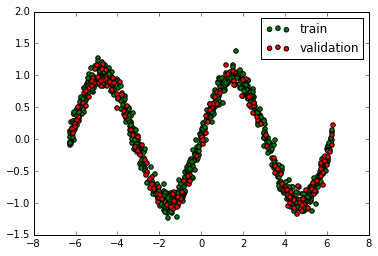

In [4]:
plt.figure(1)
plt.scatter(trainx, trainy, c='green', label='train')
plt.scatter(validx, validy, c='red', label='validation')
plt.legend()

In [5]:
X = tf.placeholder(tf.float32, [None, 1], name="X")
Y = tf.placeholder(tf.float32, [None, 1], name="Y")

In [6]:
def init_weights(shape, init_method='xavier', xavier_params = (None, None)):
    if init_method == 'zeros':
        return tf.Variable(tf.zeros(shape, dtype=tf.float32))
    elif init_method == 'uniform':
        return tf.Variable(tf.random_normal(shape, stddev=0.01, dtype=tf.float32))
    else: #xavier
        (fan_in, fan_out) = xavier_params
        low = -4*np.sqrt(6.0/(fan_in + fan_out)) # {sigmoid:4, tanh:1} 
        high = 4*np.sqrt(6.0/(fan_in + fan_out))
        return tf.Variable(tf.random_uniform(shape, minval=low, maxval=high, dtype=tf.float32))

In [7]:
def model(X, num_hidden=10):    
    w_h = init_weights([1, num_hidden], 'xavier', xavier_params=(1, num_hidden))
    b_h = init_weights([1, num_hidden], 'zeros')
    h = tf.nn.sigmoid(tf.matmul(X, w_h) + b_h)
    
    w_o = init_weights([num_hidden, 1], 'xavier', xavier_params=(num_hidden, 1))
    b_o = init_weights([1, 1], 'zeros')
    return tf.nn.sigmoid(tf.matmul(h, w_o) + b_o)

In [8]:
yhat = model(X, NUM_HIDDEN_NODES)

In [9]:
train_op = tf.train.AdamOptimizer().minimize(tf.nn.l2_loss(yhat - Y))

In [10]:
sess = tf.Session()
sess.run(tf.initialize_all_variables())

epoch 0, validation MSE 53.8681
epoch 100, validation MSE 42.1203
epoch 200, validation MSE 41.4477
epoch 300, validation MSE 41.2207
epoch 400, validation MSE 41.0519
epoch 500, validation MSE 40.9101
epoch 600, validation MSE 40.7863
epoch 700, validation MSE 40.674
epoch 800, validation MSE 40.5649
epoch 900, validation MSE 40.4313


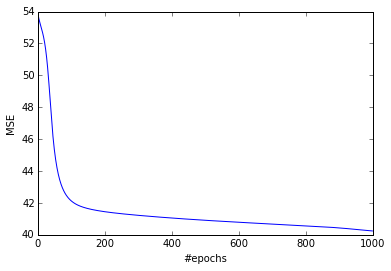

In [11]:
errors = []
for i in range(NUM_EPOCHS):
    for start, end in zip(range(0, len(trainx), MINI_BATCH_SIZE), range(MINI_BATCH_SIZE, len(trainx), MINI_BATCH_SIZE)):
        sess.run(train_op, feed_dict={X: trainx[start:end], Y: trainy[start:end]})
    mse = sess.run(tf.nn.l2_loss(yhat - validy),  feed_dict={X:validx})
    errors.append(mse)
    if i%100 == 0: print "epoch %d, validation MSE %g" % (i, mse)
plt.plot(errors)
plt.xlabel('#epochs')
plt.ylabel('MSE')